## Analytics of COVID-19 pandemic in Malaysia

This notebook provides an analytical tool to assess the COVID-19 pandemic in Malaysia in detail. 

In particular, the vaccine effectiveness of Pfizer-BioNTech, Oxford-AstraZeneca and Sinovac are assessed in detail.

Created by: Roger Teoh

#### Load dataset  

In [1]:
from analytics.linelists import Linelists

linelists = Linelists()

In [2]:
linelists.last_updated

Timestamp('2021-12-17 00:00:00')

In [3]:
t_start = "2021-07-01"
t_end = "2021-12-15"

### Breakdown of daily cases by age group 

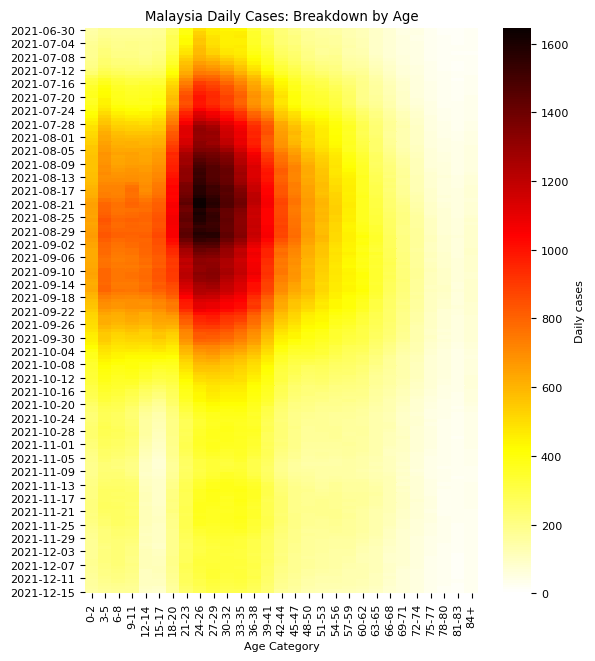

In [4]:
linelists.plot_cases_by_age_group(t_start, t_end, bin_size=3)

### Breakthrough cases by vaccine type 

- Metric: cases per 100,000 people
- Oxford-AstraZeneca set to NaN before 1-Aug-2021 due to small sample size

In [5]:
df_breakthrough_cases = linelists.get_breakthrough_cases_time_series(
    t_start, t_end, moving_average=7
)

df_breakthrough_cases.tail()

,Unvaccinated,Pfizer-BioNTech,Oxford-AstraZeneca,Sinovac
2021-12-11,16.730333,12.407736,17.856127,16.363656
2021-12-12,16.282485,12.217708,17.670241,15.812854
2021-12-13,15.772630,11.967718,17.250965,15.506530
2021-12-14,15.416011,11.553595,17.050765,15.105222
2021-12-15,14.825180,11.078604,16.539055,14.652382


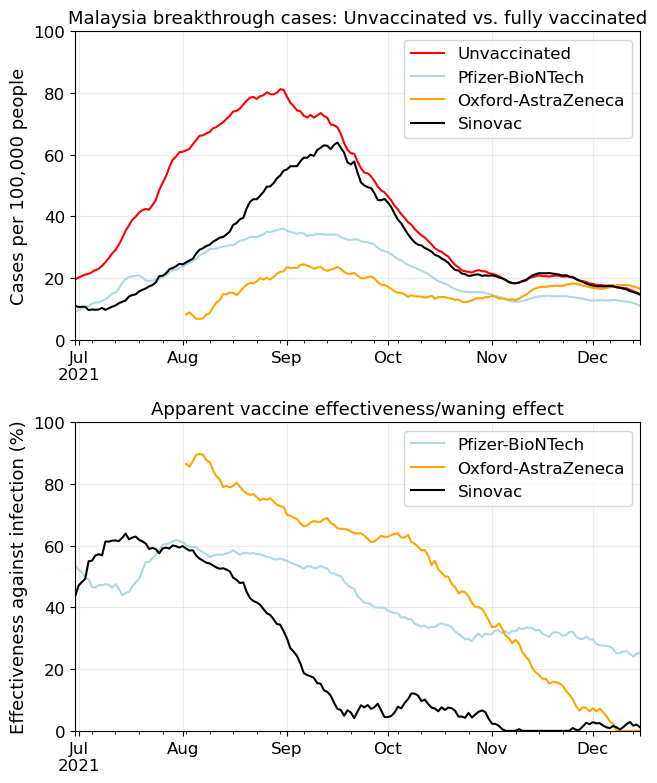

In [6]:
linelists.plot_breakthrough_cases_time_series(t_start, t_end, moving_average=7)

### Breakthrough deaths by vaccine type 

- Metric: deaths per 100,000 people
- Oxford-AstraZeneca set to NaN before 15-Aug-2021 due to small sample size

In [7]:
df_breakthrough_deaths = linelists.get_breakthrough_deaths_time_series(
    t_start, t_end, moving_average=7
)

df_breakthrough_deaths.tail()

,Unvaccinated,Pfizer-BioNTech,Oxford-AstraZeneca,Sinovac
2021-12-11,0.175881,0.059372,0.049547,0.117796
2021-12-12,0.163268,0.059339,0.056608,0.110601
2021-12-13,0.167625,0.050690,0.063681,0.103398
2021-12-14,0.163478,0.051747,0.056602,0.097636
2021-12-15,0.146559,0.047423,0.042445,0.089008


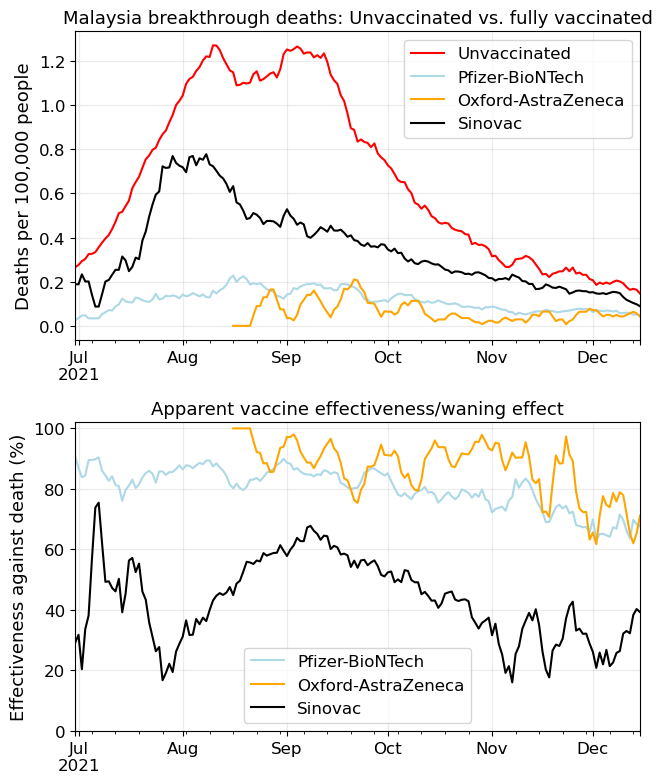

In [8]:
linelists.plot_breakthrough_deaths_time_series(t_start, t_end, moving_average=7)

### Breakthrough deaths by age and vaccine type 

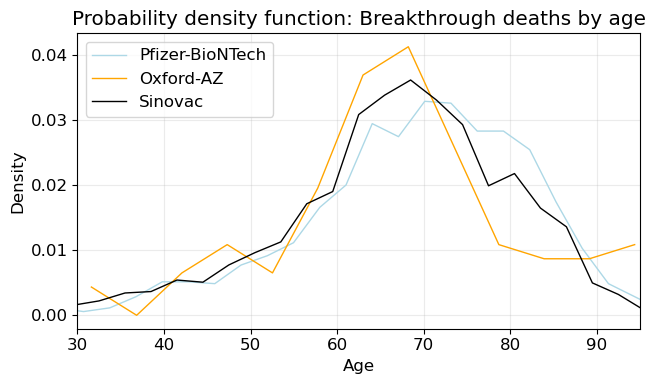

In [9]:
linelists.plot_breakthrough_deaths_pdf_by_age(density=True)

### Vaccinations 

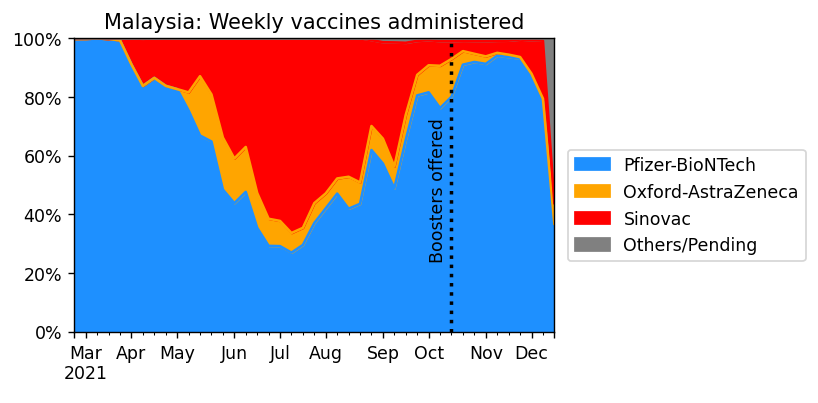

In [1]:
from analytics.vaccinations import Vaccinations

vaccinations = Vaccinations()
vaccinations.plot_daily_vaccines_administered(percentage=True)

#### Booster Campaign Progress 

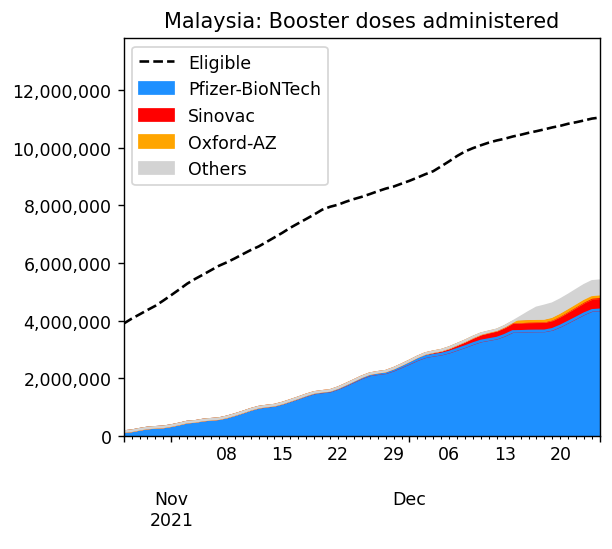

In [2]:
vaccinations.plot_booster_campaign_progress()

### Weekly deaths by vaccination status

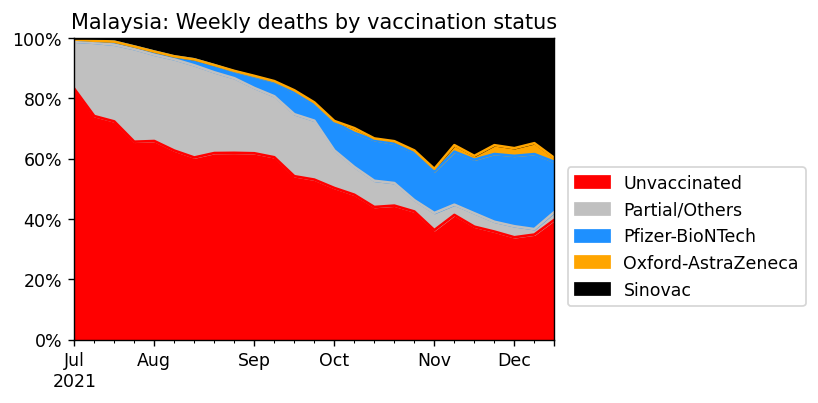

In [11]:
linelists.plot_deaths_by_vaccination_status(t_start, t_end, percentage=True)

In [12]:
linelists.get_death_statistics_by_vax_status(past_n_days=14)

In between 2021-12-04 and 2021-12-17:
  - 20.5% of the unvaccinated population accounted for 36.4% of all deaths
  - 40.7% of the population with (2x) Pfizer-BioNTech caused 22.4% of all deaths
  - 6.2% of the population with (2x) Oxford-AstraZeneca caused 3.1% of all deaths
  - 30.5% of the population with (2x) Sinovac caused 35.9% of all deaths


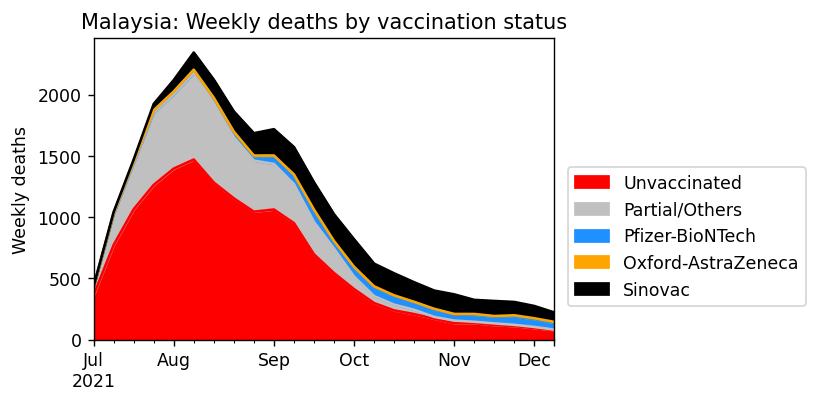

In [13]:
linelists.plot_deaths_by_vaccination_status(t_start, t_end, percentage=False)